In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline

In [2]:
#Gathering Data
Data = pd.read_csv("/Users/sktangihanoshin/Desktop/netflow_day-02.csv",sep=",",index_col=False , nrows=1000)

In [3]:
#First 5 Rows of Data
Data.head(1000)

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0
5,118785,63173,IP564116,Comp141988,17,5060,5060,7061,0,5745536,0
6,118785,78594,IP564116,Comp141988,17,5060,5060,8638,0,7052947,0
7,118785,90763,IP564116,Comp141988,17,5060,5060,9943,0,8105139,0
8,118785,104427,IP564116,Comp141988,17,5060,5060,11544,0,9398696,0
9,118785,115677,IP564116,Comp141988,17,5060,5060,13011,0,10586412,0


In [4]:
#Selecting Numeric Fields To Be Used In Modelling
X = Data[[' srcPackets',' dstPackets',' srcBytes',' dstBytes']]

In [5]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [9]:
#Assining Column Names
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [11]:
#Assigning cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcPackets','dstPackets','srcBytes','dstBytes']))


Cluster centers of columns:

   srcPackets  dstPackets  srcBytes  dstBytes
0    0.908142    0.922063  0.908104  0.914847
1    0.002403    0.000386  0.004066  0.002879


In [12]:
from sklearn import metrics
from scipy.spatial.distance import cdist

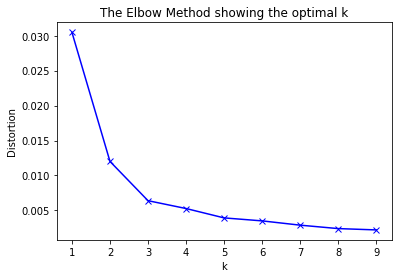

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9915047583494618
For n_clusters = 3 The average silhouette_score is : 0.9726328603700914
For n_clusters = 4 The average silhouette_score is : 0.9701038688648171
For n_clusters = 5 The average silhouette_score is : 0.9549317135494081
For n_clusters = 6 The average silhouette_score is : 0.9580324297220992
For n_clusters = 7 The average silhouette_score is : 0.9329407640373784
For n_clusters = 8 The average silhouette_score is : 0.9326411134409764
For n_clusters = 9 The average silhouette_score is : 0.9299454299165616


In [17]:
dataCopy = Data

In [18]:
labels = kmeans.labels_
dataCopy['clusters'] = labels
X2 = ['srcPackets','dstPackets','srcBytes','dstBytes', 'clusters']

In [19]:
dataCopy.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes,clusters
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018,1
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408,1
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0,1
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0,1
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0,1


In [20]:
print (labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [21]:
dataCopy.ix[100]

time               119025
 duration            5197
 srcDevice     Comp894353
 dstDevice     Comp468694
 protocol               6
 srcPort        Port50459
 dstPort               80
 srcPackets          3744
 dstPackets          3743
 srcBytes          172224
 dstBytes          729885
clusters                1
Name: 100, dtype: object

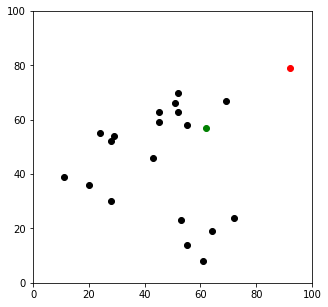

In [22]:
## Initialisation
##Genereating random picked numbers x and y axis to show clustering in graph 
#Clusteter two will show the graph 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [11, 20, 28, 28, 29, 43, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 67, 24]
})


np.random.seed(400)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 100), np.random.randint(0, 100)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [23]:
dataCopy = Data

In [25]:
dataCopy.ix[100]

time               119025
 duration            5197
 srcDevice     Comp894353
 dstDevice     Comp468694
 protocol               6
 srcPort        Port50459
 dstPort               80
 srcPackets          3744
 dstPackets          3743
 srcBytes          172224
 dstBytes          729885
clusters                1
Name: 100, dtype: object

Automatically created module for IPython interactive environment


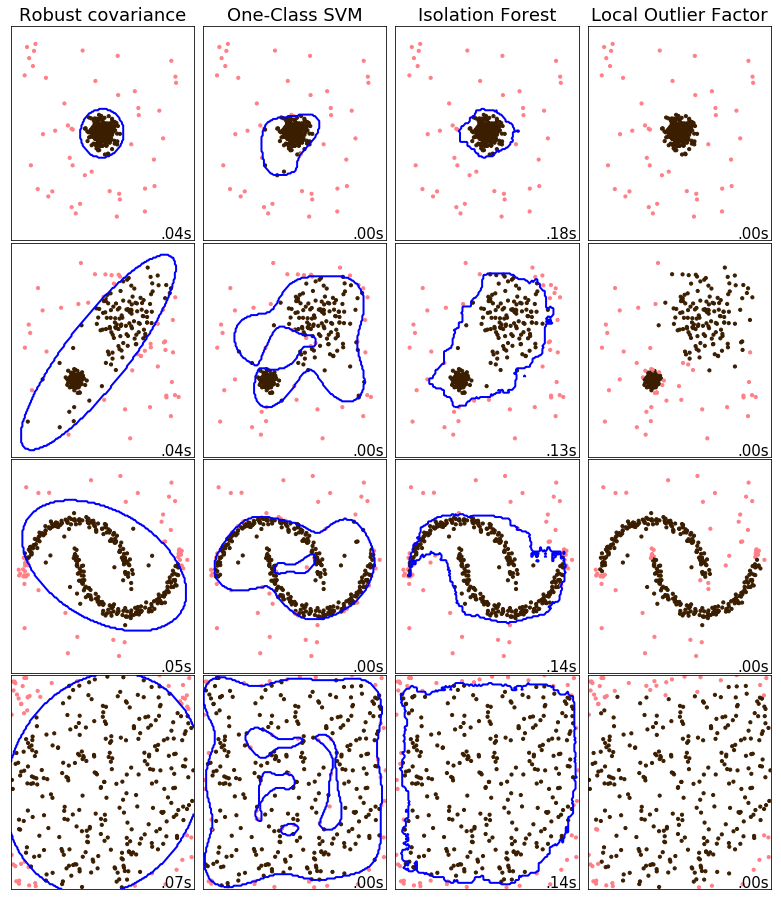

In [31]:
##showing cluster 2 in different 

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_clusters = 2
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='blue')

        colors = np.array(['#ff7f86', '#3b1d00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()